In [1]:
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

### Steps

The data being used in this analysis are imbalanced, therefore we will have to think about how to best determine the accuracy of our models. The first instict would be to use auPRC to determine accuracy of our models. Secondly, we will need to think about some normalization techniques bbefore training of our models. 

1. Extract all the test data
2. Automate the whole analsysis form start to finish
3. Optimize algorithm by choosing the relevant data
4. 

In [3]:
clinical_df = pd.read_csv('../Data/Clinical_Data/sc1_Training_ClinAnnotations.csv')

In [4]:
training_data = clinical_df[['Patient', 'D_Age', 'D_Gender', 'D_ISS','HR_FLAG']]

In [5]:
training_data = training_data.set_index('Patient')

In [6]:
training_data

,D_Age,D_Gender,D_ISS,HR_FLAG
Patient,,,,
MMRF_1016,56,Male,1.0,FALSE
MMRF_1021,54,Female,1.0,FALSE
MMRF_1029,46,Male,1.0,FALSE
MMRF_1030,65,Female,1.0,FALSE
MMRF_1031,62,Male,1.0,FALSE
MMRF_1032,76,Male,2.0,FALSE
MMRF_1033,64,Male,1.0,TRUE
MMRF_1037,81,Female,1.0,CENSORED
MMRF_1038,69,Male,3.0,FALSE


In [11]:
#(training_data.HR_FLAG == 'FALSE') or (training_data.HR_FLAG == 'TRUE')

In [12]:
# A simple function for coding gender
def code_gender(f):
    g_list = []
    for f in female:
        if f == 'Female':
            g_list.append(0)
        else:
            g_list.append(1)        

In [13]:
#real_data['D_PFS_FLAG_18'] = pd.get_dummies((real_data['D_PFS']/30.4167 >18) & (real_data['D_PFS_FLAG'] == 1) )[True]

#### 1. Encode gender and labels

The issue here is how to deal with the CENSORED data? Do we need to make predictions on these?

In [7]:
training_data['Gender'] = pd.get_dummies(training_data['D_Gender'])['Male']
training_data.drop('D_Gender', axis=1, inplace=True)

In [15]:
training_data = training_data.loc[training_data['HR_FLAG'].isin(['FALSE','TRUE'])]

training_data['FLAG'] = pd.get_dummies(training_data['HR_FLAG'])['TRUE']
training_data.drop('HR_FLAG', axis=1, inplace=True)

In [16]:
#train_df = real_data['D_Age	D_OS_FLAG	D_PFS	D_PFS_FLAG	D_ISS	D_PFS_FLAG_18	Gender'.split()]

In [17]:
training_data

,D_Age,D_ISS,Gender,FLAG
Patient,,,,
MMRF_1016,56,1.0,1.0,0.0
MMRF_1021,54,1.0,0.0,0.0
MMRF_1029,46,1.0,1.0,0.0
MMRF_1030,65,1.0,0.0,0.0
MMRF_1031,62,1.0,1.0,0.0
MMRF_1032,76,2.0,1.0,0.0
MMRF_1033,64,1.0,1.0,1.0
MMRF_1038,69,3.0,1.0,0.0
MMRF_1045,81,NaN,0.0,0.0


#### 2. Check for null values in the dataset

In [18]:
training_data.isnull().sum()

D_Age      0
D_ISS     18
Gender     0
FLAG       0
dtype: int64

#### 3. Fill the null values with a mode value

Since there are null values in our data we need to fill this up using the most common ISS stage. The mean is not approriate in this case since they are just labels. 

In [19]:
training_data.D_ISS.fillna(1.0, inplace=True)

#### 4. Read and combine the data 

In [7]:
consequence_df = pd.read_csv('../consequence_data_percentage_snvs.csv')
#consequence_df2 = pd.read_csv('../consequence_data_percentage_indels.csv')

In [9]:
consequence_df.fillna(0,inplace=True)

In [28]:
consequence_df.insert(0,'Patient',clinical_df['Patient'])

In [30]:
consequence_df.to_csv('model2/consequence_data_percentage_snvs.csv', index=False)

In [21]:
#consequence_df['TF_binding_site_variant'] = consequence_df2['TF_binding_site_variant']

In [22]:
consequence_df.count()

missense_variant         737
synonymous_variant       737
frameshift_variant       737
inframe_deletion         737
stop_gained              737
stop_lost                737
stop_retained_variant    737
dtype: int64

In [9]:
consequence_df.TF_binding_site_variant.fillna(consequence_df.TF_binding_site_variant.mean(), inplace=True)

In [24]:
## Reset the index in order to merge the DFs
training_data.reset_index(inplace=True)
training_data.drop('Patient', axis=1,inplace=True)

In [25]:
training_df = pd.concat([training_data, consequence_df], axis=1)
training_df.drop('index', axis=1, inplace=True)

ValueError: labels ['index'] not contained in axis

In [26]:
training_df.drop('level_0',axis=1, inplace=True)

ValueError: labels ['level_0'] not contained in axis

In [46]:
training_df.columns

Index([u'D_Age', u'D_ISS', u'Gender', u'FLAG', u'missense_variant',
       u'synonymous_variant', u'frameshift_variant', u'inframe_deletion',
       u'stop_gained', u'stop_lost', u'stop_retained_variant'],
      dtype='object')

In [28]:
training_df = training_df.loc[training_df['HR_FLAG'].isin(['FALSE','TRUE'])]

training_df['FLAG'] = pd.get_dummies(training_df['HR_FLAG'])['TRUE']
training_df.drop('HR_FLAG', axis=1, inplace=True)

KeyError: 'HR_FLAG'

In [29]:
training_df['Gender'] = pd.get_dummies(training_df['D_Gender'])['Male']
training_df.drop('D_Gender', axis=1, inplace=True)

KeyError: 'D_Gender'

In [30]:
training_df

,D_Age,D_ISS,Gender,FLAG,missense_variant,synonymous_variant,frameshift_variant,inframe_deletion,stop_gained,stop_lost,stop_retained_variant
0,56.0,1.0,1.0,0.0,52.034015,25.281544,2.321305,17.398299,2.803953,0.000000,0.160883
1,54.0,1.0,0.0,0.0,51.074547,21.692411,2.820685,22.095366,2.316991,0.000000,0.000000
2,46.0,1.0,1.0,0.0,50.657895,21.107456,3.207237,21.957237,2.850877,0.000000,0.219298
3,65.0,1.0,0.0,0.0,50.338462,22.430769,3.076923,20.707692,3.415385,0.030769,0.000000
4,62.0,1.0,1.0,0.0,65.450205,27.796726,0.852660,2.933151,2.967258,0.000000,0.000000
5,76.0,2.0,1.0,0.0,62.810133,25.594150,2.115435,5.562810,3.891355,0.026116,0.000000
6,64.0,1.0,1.0,1.0,66.615432,26.375653,1.198893,2.920381,2.643713,0.215186,0.030741
7,69.0,3.0,1.0,0.0,65.684912,25.646013,1.472631,3.639900,3.417616,0.138927,0.000000
8,81.0,1.0,0.0,0.0,68.746214,25.045427,0.787402,2.907329,2.119927,0.393701,0.000000
9,53.0,1.0,0.0,0.0,50.733519,24.271123,2.525534,20.965645,1.374188,0.129991,0.000000


#### 5. Check for multicolinierity

From the clustermap below,we can see that there is little multicolinierity except for inframe_deletion and frameshift variant.

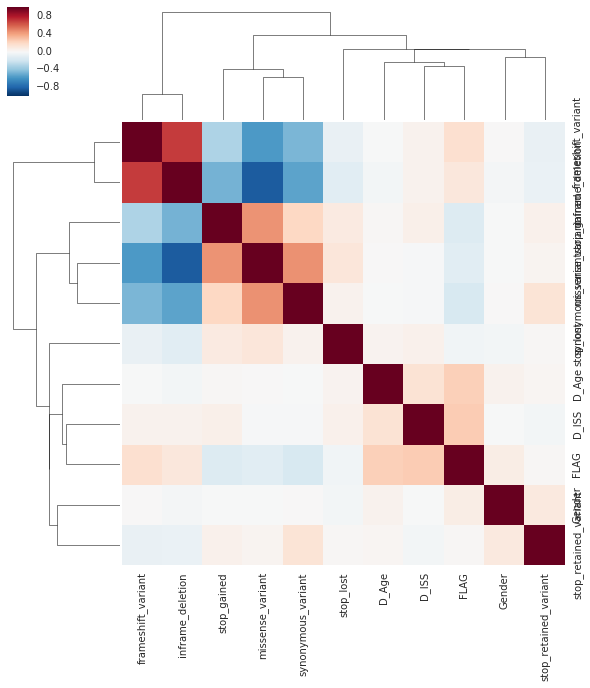

In [31]:
sns.clustermap(training_df.corr())

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
#from ggplot import *
import time
import re
import seaborn as sns
#plt.style.use('ggplot')
%matplotlib inline

# packages for checking assumptions
from scipy import stats as stats

# packages for linear regression and validation 
import statsmodels.formula.api as sm
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error

# the command below means that the output of multiple commands in a cell will be output at once.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# the command below tells jupyter to display up to 80 columns, this keeps everything visible
pd.set_option('display.max_columns', 80)
pd.set_option('expand_frame_repr', True)


In [32]:
def print_scores(regressor, X_train, y_train, X_test, y_test, oob_score=True):
    print("Train score: " + str(regressor.score(X_train, y_train)))
    print("Test score: " + str(regressor.score(X_test, y_test)))
    if oob_score:
        print("OOB score: " + str(regressor.oob_score_))
        
def train_linear_r(X_train, y_train, X_test, y_test):
    # Create linear regression object
    regr = linear_model.LinearRegression()
    
    # Train the model using the training sets
    model1 = regr.fit(X_train, y_train)
    
    print_scores(model1, X_train, y_train, X_test, y_test, oob_score=False)
    plot_test(model1, X_train, y_train, 'train')
    plot_test(model1, X_test, y_test, 'test')
    
def plot_test(regressor, X_test, y_test, data):
    rf_y_predicted_test = regressor.predict(X_test)
    print("Mean squared error: %d " % round(mean_squared_error(y_test, rf_y_predicted_test)))
    fig = plt.figure(figsize=(7, 7))
    plt.scatter(y_test, rf_y_predicted_test, alpha=0.5)
    plt.xlabel('True value')
    plt.ylabel('Predicted value')
    plt.title("Relationship between True Y and predicted Y* (%s dataset)" % data)
    plt.show()

### 6. Prapare the data for training

In [33]:
def prepare_train_data(train_df, pred_var):
    """
    Given a dataframe and the predictive variable, this
    function returns train and test arrays generated using  the  
    scikit--learn split function
    """
    rf_trainRes = train_df[pred_var]
    train_df = train_df.drop(pred_var, axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(train_df, rf_trainRes, test_size=0.2, random_state=42)
    
    train_df[pred_var] = rf_trainRes

    return X_train, X_test, y_train, y_test

In [36]:
X_train, X_test, y_train, y_test = prepare_train_data(training_df, 'FLAG')

In [23]:
#train_df.D_PFS_FLAG_18.sum()/train_df.D_PFS_FLAG_18.count()

In [37]:
def decision_tree_c(X_train, y_train, X_test, y_test):
    from sklearn.tree import DecisionTr
    # Step 1: Initiating the DecisionTreeRegressor algorithm
    decision_regressor = DecisionTreeRegressor(random_state=0)
    # Step 2: Training the algorithm using the X_train dataset of features and y_train, the associated target features
    decision_regressor.fit(X_train, y_train)
    # step 3: Print prediction scores
    print_scores(decision_regressor, X_train, y_train, X_test, y_test, oob_score=False)
    plot_test(decision_regressor, X_train, y_train, 'train')
    plot_test(decision_regressor, X_test, y_test, 'test')

#### Sanity check for nulls

In [41]:
feat_columns = training_df.columns
feat_columns = list(feat_columns)
X_train, X_test, y_train, y_test = prepare_train_data(training_df, 'FLAG')
print "Complete"
our_params = {'eta': 0.3, 'seed':0, 'subsample': 1, 'colsample_bytree': 1,'scale_pos_weight': 1, 
              'objective': 'binary:logistic', 'max_depth':10, 'min_child_weight':1,
              'n_estimators':5000, 'reg_alpha':0.005} 
complete = train_xgb(X_train,X_test,y_train, y_test,our_params)
test_list = []
for feat in feat_columns:
    poped = feat_columns.pop()
    if poped == 'FLAG':
        feat_columns.insert(0,poped)
        continue
    else:
        print poped
        training_df_2 = training_df[feat_columns]
        X_train, X_test, y_train, y_test = prepare_train_data(training_df_2, 'FLAG')
        test = train_xgb(X_train,X_test,y_train, y_test,our_params)
        test_list.append((poped,test))
        feat_columns.insert(0,poped)
        
feat_importance = pd.DataFrame(test_list)
feat_importance['importance'] = complete - feat_importance[1]
feat_importance.columns = [['feature', 'auPRC','importance']]
feat_importance.sort_values(by='importance', ascending=False)

Complete


XGBoostError: [16:49:15] src/objective/regression_obj.cc:108: label must be in [0,1] for logistic regression

In [175]:
complete

0.52525987206691049

In [39]:
import xgboost as xgb

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm

#Accuracy metrics
from sklearn.metrics import accuracy_score, classification_report, auc
from sklearn.metrics import accuracy_score, classification_report, auc
from sklearn.metrics import precision_recall_curve, roc_auc_score

from sklearn import feature_selection

from sklearn.externals import joblib

from xgboost import XGBClassifier

import xgboost as xgb

def train_sgd(feature_frame, feature_frame_p, y_train, y_test):
    scaler = MinMaxScaler()
    #Scale the train data
    scaler.fit(feature_frame) 
    X_train = scaler.transform(feature_frame)

    #Scale the test data as well
    scaler.fit(feature_frame_p)
    X_test = scaler.transform(feature_frame_p)
    
    clf = SGDClassifier()
    clf.fit(X_train, y_train)
    pred_sgd = clf.predict(X_test)
    
    return roc_auc_score(y_test, pred_sgd)

def train_svm(feature_frame, feature_frame_p, y_train, y_test):
    scaler = MinMaxScaler()
    #Scale the train data
    scaler.fit(feature_frame) 
    X_train = scaler.transform(feature_frame)

    #Scale the test data as well
    scaler.fit(feature_frame_p)
    X_test = scaler.transform(feature_frame_p)
    
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    pred_svm = clf.predict(X_test)
    
    print("auPRC score: %f" % scikitlearn_calc_auPRC(y_test, pred_svm))
    
    return roc_auc_score(y_test, pred_svm)

def train_xgb(feature_frame,feature_frame_p,y_train, y_test, our_params):
    
    xgdmat = xgb.DMatrix(feature_frame, y_train)
    my_model = xgb.train(our_params,xgdmat)
    testdmat = xgb.DMatrix(feature_frame_p, y_test)
    y_pred = my_model.predict(testdmat)
    
    plot_feature_importance(my_model, 'Features.png')
    
    print("AUC score: %f" % roc_auc_score(y_test, y_pred))
    
    return scikitlearn_calc_auPRC(y_test, y_pred)

def train_gradient(feature_frame,feature_frame_p,y_train, y_test):
    clf = GradientBoostingClassifier()
    clf.fit(feature_frame, y_train)
    pred_sgd = clf.predict(feature_frame_p)
    
    print("auPRC score: %f" % scikitlearn_calc_auPRC(y_test, pred_sgd))

    return roc_auc_score(y_test, pred_sgd)

def train_randomF(feature_frame,feature_frame_p,y_train, y_test):
    rf_classifier = RandomForestClassifier(n_estimators=100, oob_score=True)
    # Step 2: Training the random regressor algorithm

    rf_classifier.fit(feature_frame, y_train)
    # Step 3: Calculating the score of the predictive power on the training and testing dataset.
    #print_scores(rf_classifier, X_train, y_train, X_test, y_test, oob_score=True)
    #clf = GradientBoostingClassifier()
    #clf.fit(feature_frame, y_train)
    pred_rand = rf_classifier.predict(feature_frame_p)
    
    print("auPRC score: %f" % scikitlearn_calc_auPRC(y_test, pred_rand))

    return roc_auc_score(y_test, pred_rand)

def get_auc(y_test, y_pred, lab=1):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=lab)
    return metrics.auc(fpr, tpr)

def scikitlearn_calc_auPRC(y_true, y_score):
    
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    return auc(recall, precision)

In [40]:
def plot_feature_importance(xgb_model, fig_out):
    sns.set(font_scale = 1.5)
    fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
    xgb.plot_importance(xgb_model, ax=ax)
    #ax.plot([0,1,2], [10,20,3])
    fig.savefig(fig_out, bbox_inches='tight')   # save the figure to file
    plt.close(fig)

### Baseline models

In [29]:
y_test.sum()

33.0

In [30]:
train_gradient(X_train, X_test, y_train, y_test)

auPRC score: 0.380801


0.53886693017127796

In [31]:
train_randomF(X_train,X_test,y_train, y_test)

auPRC score: 0.408579


0.54321475625823445

In [32]:
our_params = {'eta': 0.3, 'seed':0, 'subsample': 1, 'colsample_bytree': 1,'scale_pos_weight': 1, 
              'objective': 'binary:logistic', 'max_depth':10, 'min_child_weight':1,
              'n_estimators':5000, 'reg_alpha':0.005} 
train_xgb(X_train,X_test,y_train, y_test,our_params)

auPRC score: 0.506375


0.72173913043478266

In [33]:
train_svm(X_train,X_test,y_train, y_test)

auPRC score: 0.611486


0.5

### Verdict

From these analysis, we can have very low performance of our models, especially when we compare the AUC and auPRC scores. These scores show that we need to put more focus on feature enginering and parameter optimization. Therefore, thenext stage in this analysis is to optimize the praneters and see how well how models are performing. 

In [89]:
cyto = 'CYTO_predicted_feature_01	CYTO_predicted_feature_02	CYTO_predicted_feature_03	CYTO_predicted_feature_05	CYTO_predicted_feature_06	CYTO_predicted_feature_08	CYTO_predicted_feature_12	CYTO_predicted_feature_13	CYTO_predicted_feature_14	CYTO_predicted_feature_15	CYTO_predicted_feature_16	CYTO_predicted_feature_17	CYTO_predicted_feature_18'.split()